# Exploring Hackers News Posts

##### My aim is to understand which type of posts receive more comments on an average

In this project, I'll compare two different types of posts from [Hacker News](https://news.ycombinator.com/), a popular site where technology related stories (or 'posts') are voted and commented upon. The two types of posts begin with either Ask HN or Show HN.

Users submit Ask HN posts to ask the Hacker News community a specific question, such as "What is the best online course you've ever taken?" Likewise, users submit Show HN posts to show the Hacker News community a project, product, or just generally something interesting.

I'll specifically compare these two types of posts to determine the following:

Do Ask HN or Show HN receive more comments on average?
Do posts created at a certain time receive more comments on average?

## Reading the data and removing the headers

In [1]:
from csv import reader
opened_file = open('hacker_news.csv')
read_file = reader(opened_file)
hn = list(read_file)

print(hn[:5])

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'], ['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']]


In [2]:
# Remove the headers
headers = hn[0]
hn = hn[1:]
print(headers)
print("\n")
print(hn[:5])

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']


[['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01'], ['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell', '9/30/2015 4:12']]


It can be seen above that the data set contains the title of the posts, the number of comments for each post, and the date the post was created. I am starting by exploring the number of comments for each type of post.

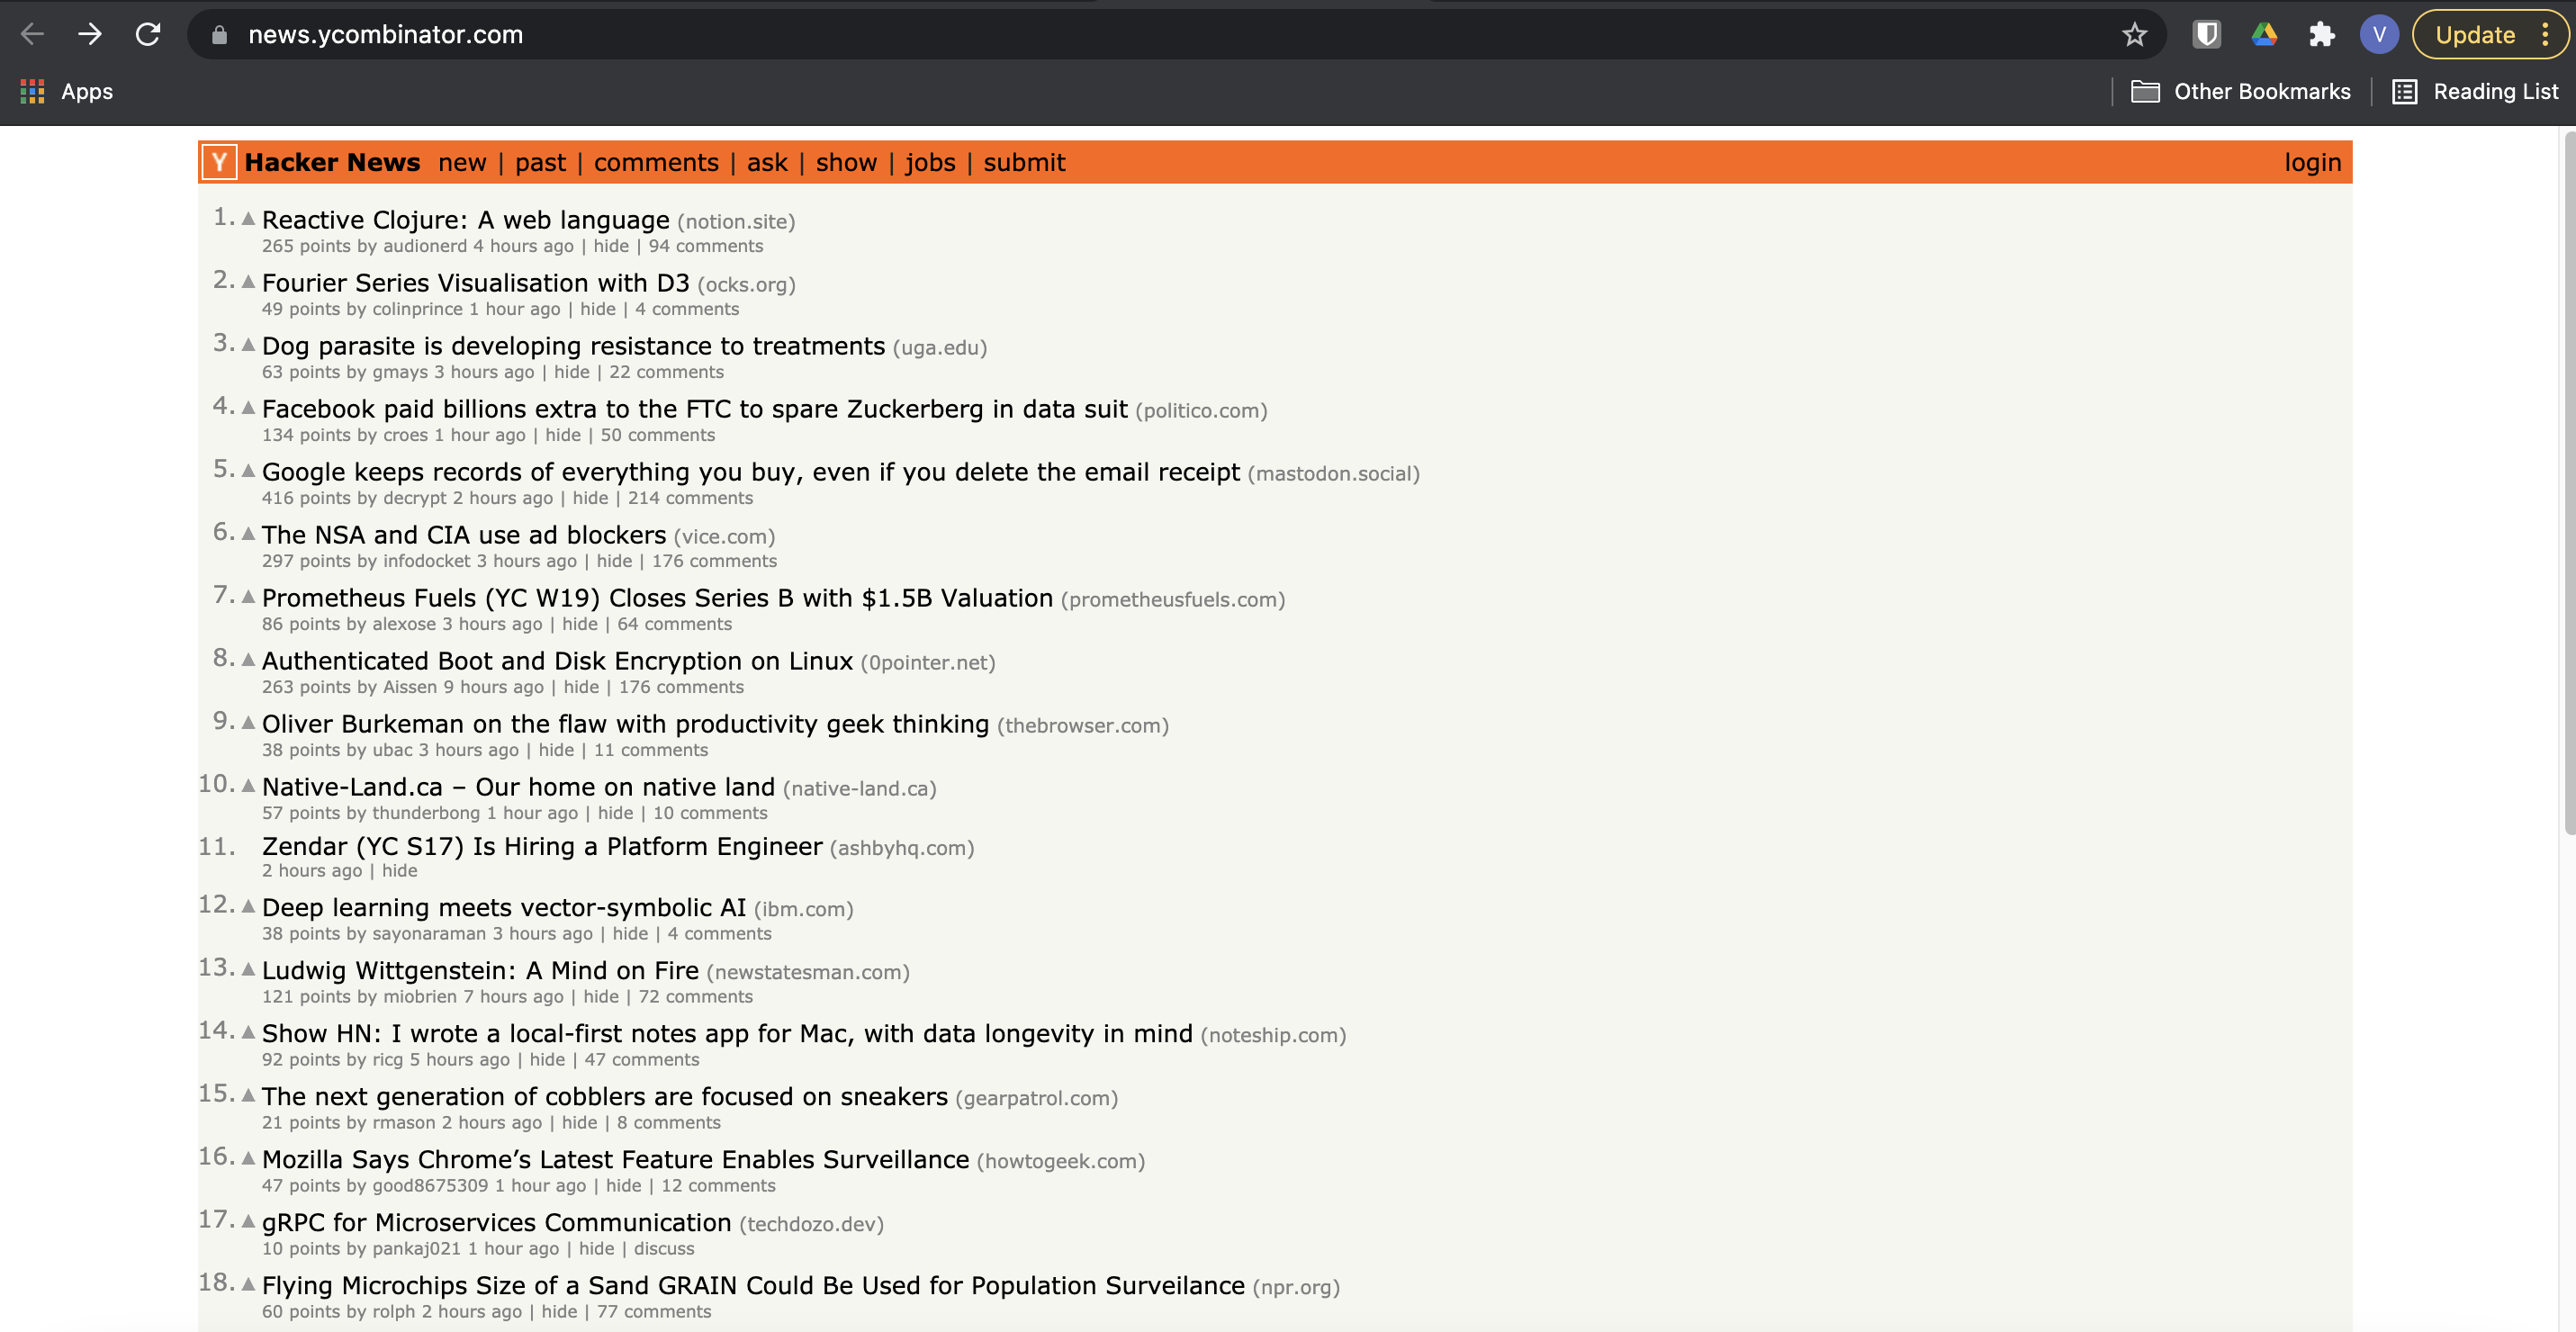

In [3]:
from IPython.display import Image
Image(filename = "Hacker_News_Post.png", width = 8000, height = 800)

## Extracting Ask HN and Show HN Posts

Identifying posts that begin with either Ask HN or Show HN and separate the data for those two types of posts into different lists. Separating the data makes it easier to analyze in the following steps.

In [4]:
ask_posts = []
show_posts = []
other_posts = []

for row in hn:
    title = row[1]
    if title.lower().startswith('ask hn'):
        ask_posts.append(row)
    elif title.lower().startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)
        
print(len(ask_posts))
print(len(show_posts))
print(len(other_posts))        

1744
1162
17194


In [5]:
ask_posts[:3]

[['12296411',
  'Ask HN: How to improve my personal website?',
  '',
  '2',
  '6',
  'ahmedbaracat',
  '8/16/2016 9:55'],
 ['10610020',
  'Ask HN: Am I the only one outraged by Twitter shutting down share counts?',
  '',
  '28',
  '29',
  'tkfx',
  '11/22/2015 13:43'],
 ['11610310',
  'Ask HN: Aby recent changes to CSS that broke mobile?',
  '',
  '1',
  '1',
  'polskibus',
  '5/2/2016 10:14']]

In [6]:
show_posts[:3]

[['10627194',
  'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform',
  'https://iot.seeed.cc',
  '26',
  '22',
  'kfihihc',
  '11/25/2015 14:03'],
 ['10646440',
  'Show HN: Something pointless I made',
  'http://dn.ht/picklecat/',
  '747',
  '102',
  'dhotson',
  '11/29/2015 22:46'],
 ['11590768',
  'Show HN: Shanhu.io, a programming playground powered by e8vm',
  'https://shanhu.io',
  '1',
  '1',
  'h8liu',
  '4/28/2016 18:05']]

## Calculating the Average Number of Comments for Ask HN and Show HN Posts

After separating ask posts and show posts into different lists, I'll calculate the average number of comments each type of post receives.

In [7]:
# Calculating the average number of comments `Ask HN` posts receive

total_ask_comments = 0

for row in ask_posts:
    num_comments = row[4]
    total_ask_comments += int(num_comments)

avg_ask_comments = total_ask_comments/len(ask_posts)  
print(avg_ask_comments)

14.038417431192661


In [8]:
# Calculating the average number of comments `Show HN` posts receive

total_show_comments = 0

for row in show_posts:
    num_comments = row[4]
    total_show_comments += int(num_comments)

avg_show_comments = total_show_comments/len(show_posts)  
print(avg_show_comments)

10.31669535283993


On average, ask posts in the sample receive approximately 14 comments, whereas show posts receive approximately 10. Since ask posts are more likely to receive comments, I'll focus our remaining analysis just on these posts.

## Finding the Amount of Ask Posts and Comments by Hour Created

Next, I'll determine if I can maximize the amount of comments an ask post receives by creating it at a certain time. First, I'll find the amount of ask posts created during each hour of day, along with the number of comments those posts received. Then, I'll calculate the average amount of comments ask posts created at each hour of the day receive.

In [9]:
# Calculating the amount of ask posts created during each hour of day and the number of comments received
import datetime as dt
result_list = []

for row in ask_posts:
    date_created = row[6]
    num_comments = int(row[4])
    result_list.append([date_created, num_comments])
    
print(result_list[:3])


[['8/16/2016 9:55', 6], ['11/22/2015 13:43', 29], ['5/2/2016 10:14', 1]]


In [10]:
counts_by_hour = {}         #number of ask posts created in each hour of the day
comments_by_hour = {}       #number of comments received

for element in result_list:
    date_object = dt.datetime.strptime(element[0], "%m/%d/%Y %H:%M")
    hour_created = date_object.hour
    comments = element[1]
    
    if hour_created in counts_by_hour:
        counts_by_hour[hour_created] += 1
    else:
        counts_by_hour[hour_created] = 1

    if hour_created in comments_by_hour:
        comments_by_hour[hour_created] += comments
    else:
        comments_by_hour[hour_created] = comments

In [11]:
print(counts_by_hour) #contains the number of ask posts created during each hour of the day

{9: 45, 13: 85, 10: 59, 14: 107, 16: 108, 23: 68, 12: 73, 17: 100, 15: 116, 21: 109, 20: 80, 2: 58, 18: 109, 3: 54, 5: 46, 19: 110, 1: 60, 22: 71, 8: 48, 4: 47, 0: 55, 6: 44, 7: 34, 11: 58}


In [12]:
print(comments_by_hour) #contains the corresponding number of comments ask posts created at each hour received

{9: 251, 13: 1253, 10: 793, 14: 1416, 16: 1814, 23: 543, 12: 687, 17: 1146, 15: 4477, 21: 1745, 20: 1722, 2: 1381, 18: 1439, 3: 421, 5: 464, 19: 1188, 1: 683, 22: 479, 8: 492, 4: 337, 0: 447, 6: 397, 7: 267, 11: 641}


## Calculating the Average Number of Comments for Ask HN Posts by Hour

In [13]:
avg_by_hour = []

for hr in comments_by_hour:
    avg_by_hour.append([hr, comments_by_hour[hr]/counts_by_hour[hr]])

print(avg_by_hour)    

[[9, 5.5777777777777775], [13, 14.741176470588234], [10, 13.440677966101696], [14, 13.233644859813085], [16, 16.796296296296298], [23, 7.985294117647059], [12, 9.41095890410959], [17, 11.46], [15, 38.5948275862069], [21, 16.009174311926607], [20, 21.525], [2, 23.810344827586206], [18, 13.20183486238532], [3, 7.796296296296297], [5, 10.08695652173913], [19, 10.8], [1, 11.383333333333333], [22, 6.746478873239437], [8, 10.25], [4, 7.170212765957447], [0, 8.127272727272727], [6, 9.022727272727273], [7, 7.852941176470588], [11, 11.051724137931034]]


## Sorting and Printing Values from a List of Lists

In [14]:
swap_avg_by_hour = []

for a,b in avg_by_hour:
    swap_avg_by_hour.append([b,a])   # 'a' is the hours and 'b' is the average number of comments in that hour
    
print(swap_avg_by_hour)    

print("\n")

sorted_swap = sorted(swap_avg_by_hour, reverse = True) 
print(sorted_swap)


[[5.5777777777777775, 9], [14.741176470588234, 13], [13.440677966101696, 10], [13.233644859813085, 14], [16.796296296296298, 16], [7.985294117647059, 23], [9.41095890410959, 12], [11.46, 17], [38.5948275862069, 15], [16.009174311926607, 21], [21.525, 20], [23.810344827586206, 2], [13.20183486238532, 18], [7.796296296296297, 3], [10.08695652173913, 5], [10.8, 19], [11.383333333333333, 1], [6.746478873239437, 22], [10.25, 8], [7.170212765957447, 4], [8.127272727272727, 0], [9.022727272727273, 6], [7.852941176470588, 7], [11.051724137931034, 11]]


[[38.5948275862069, 15], [23.810344827586206, 2], [21.525, 20], [16.796296296296298, 16], [16.009174311926607, 21], [14.741176470588234, 13], [13.440677966101696, 10], [13.233644859813085, 14], [13.20183486238532, 18], [11.46, 17], [11.383333333333333, 1], [11.051724137931034, 11], [10.8, 19], [10.25, 8], [10.08695652173913, 5], [9.41095890410959, 12], [9.022727272727273, 6], [8.127272727272727, 0], [7.985294117647059, 23], [7.852941176470588, 

In [15]:
# Sorting all the values and print the hours with the highest average comments
for comments, hour_string in sorted_swap:
    print_string = '{}: {:.2f} average comments per post'
    date_object = dt.datetime.strptime(str(hour_string), "%H")
    time_string = date_object.strftime("%H:%M")
    
    print(print_string.format(time_string, comments))  

15:00: 38.59 average comments per post
02:00: 23.81 average comments per post
20:00: 21.52 average comments per post
16:00: 16.80 average comments per post
21:00: 16.01 average comments per post
13:00: 14.74 average comments per post
10:00: 13.44 average comments per post
14:00: 13.23 average comments per post
18:00: 13.20 average comments per post
17:00: 11.46 average comments per post
01:00: 11.38 average comments per post
11:00: 11.05 average comments per post
19:00: 10.80 average comments per post
08:00: 10.25 average comments per post
05:00: 10.09 average comments per post
12:00: 9.41 average comments per post
06:00: 9.02 average comments per post
00:00: 8.13 average comments per post
23:00: 7.99 average comments per post
07:00: 7.85 average comments per post
03:00: 7.80 average comments per post
04:00: 7.17 average comments per post
22:00: 6.75 average comments per post
09:00: 5.58 average comments per post


The hour that receives the most comments per post on average is 15:00, with an average of 38.59 comments per post, followed by 02:00 and 20:00 hour with an average number of 23.81 and 21.52 comments per post respectively.

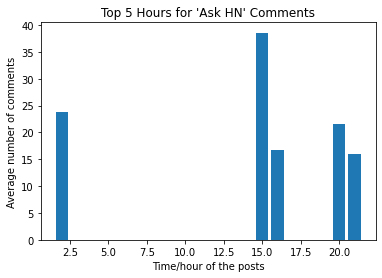

[38.5948275862069, 23.810344827586206, 21.525, 16.796296296296298, 16.009174311926607]
[15, 2, 20, 16, 21]


In [16]:
# creating the bar plot for the top 5 Hours for 'Ask HN' Comments
import matplotlib.pyplot as plt  
num_comments = []
time = []

for comments, hour_string in sorted_swap[:5]:
    num_comments.append(comments)
    time.append(hour_string)
    
plt.bar(time, num_comments)
plt.xlabel("Time/hour of the posts")
plt.ylabel("Average number of comments")
plt.title("Top 5 Hours for 'Ask HN' Comments")
plt.show()

print(num_comments)
print(time)

## Conclusion

In this project, I analyzed ask posts and show posts to determine which type of post and time receive the most comments on average. Based on my analysis, to maximize the amount of comments a post receives, I'd recommend the post be categorized as ask post and created between 15:00 and 16:00 (3:00 pm est - 4:00 pm est).

However, it should be noted that the data set I analyzed excluded posts without any comments. Given that, it's more accurate to say that of the posts that received comments, ask posts received more comments on average than show posts and ask posts created between 15:00 and 16:00 (3:00 pm est - 4:00 pm est) received the most comments on average.